In [14]:
push!(LOAD_PATH, "../../src/")

using SpikingNeuralEvolution
using Plots
using DataFrames
using Statistics

# For speed
using ThreadSafeDicts

inputs = UInt16(8)

function f(inputs::Vector{Bool}) 
    return reduce(xor, inputs)
end


evolution_parameters = EvolutionParameters(
    UInt32(1),
    UInt32(1000), 
    UInt32(80),  
    UInt32(100), 
    UInt16(1),  
    UInt16(2),  
    SpikingNeuralEvolution.MaxIterations,  
    1.0      
)

mutation_probabilities = MutationProbabilities(
    0.008,  
    0.080, 
    0.030,  
    0.200,
    0.005, 
    0.080, 
    0.010 
);

In [20]:
examples = Vector{Vector{Bool}}()
labels = Vector{Bool}()


combinations = reverse.(Iterators.product(fill(0 : 1, inputs)...))[:]

for j in 1 : Int(round((2 ^ inputs) * evolution_parameters.percentage_of_examples))
    combination = [bitstring(i)[end] == '1' for i in combinations[j]]

    push!(examples, combination)
    push!(labels, f(combination))
end

executions = Dict([])

best_circuit = 0
best_fitness = 0
;

In [21]:
for exec in 1 : 20
    executions[exec] = SpikingNeuralEvolution.Simulate(examples, labels, evolution_parameters, mutation_probabilities)
end

In [19]:
executions[1][2]

999-element Vector{Any}:
 0.5859375
 0.625
 0.625
 0.64453125
 0.64453125
 0.64453125
 0.64453125
 0.64453125
 0.65625
 0.65625
 0.65625
 0.71875
 0.7578125
 ⋮
 0.9765625
 0.9765625
 0.9765625
 0.9765625
 0.9765625
 0.9765625
 0.9765625
 0.9765625
 0.9765625
 0.9765625
 0.9765625
 0.9765625

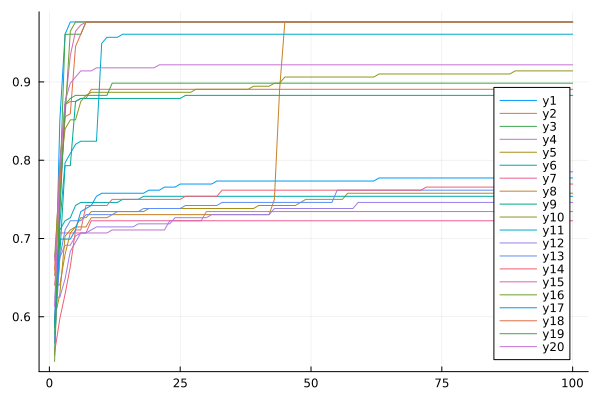

In [25]:
plot(executions[1][2][1:10:end])
for i in 2:19
    plot!(executions[i][2][1:10:end])
end
plot!(executions[20][2][1:10:end])

In [23]:
for i in 1:20
    println(executions[i][2])
end

Any[0.58984375, 0.61328125, 0.61328125, 0.61328125, 0.6171875, 0.6171875, 0.69921875, 0.69921875, 0.72265625, 0.72265625, 0.8515625, 0.87109375, 0.875, 0.875, 0.875, 0.95703125, 0.95703125, 0.95703125, 0.9609375, 0.9609375, 0.9609375, 0.97265625, 0.97265625, 0.97265625, 0.97265625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.

 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625]


Any[0.66015625, 0.66015625, 0.66015625, 0.66015625, 0.7109375, 0.75390625, 0.79296875, 0.79296875, 0.796875, 0.796875, 0.796875, 0.796875, 0.796875, 0.796875, 0.796875, 0.87109375, 0.87109375, 0.87109375, 0.87109375, 0.87109375, 0.87109375, 0.87109375, 0.87109375, 0.87109375, 0.87109375, 0.87109375, 0.87109375, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.87890625, 0.87890625, 0.87890625, 0.87890625, 0.87890625, 0.87890625, 0.87890625, 0.87890625, 0.87890625, 0.87890625, 0.87890625, 0.87890625, 0.87890625, 0.87890625, 0.87890625, 0.890625, 0.890625, 0.890625, 0.890625, 0.890625, 0.890625, 0.890625, 0.890625, 0.890625, 0.890625, 0.890625, 0.890625, 0.890625, 0.890625, 0.890625, 0.890625, 0.890625, 0.890625, 0.890625, 0.890625, 0.890625, 0.890625, 0.890625, 0.890625, 0.890625, 0.890625, 0.890625, 0.890625, 0.890625, 0.890625, 0.890625, 0.890625, 0.890625, 0.890625, 0.890625, 0.890625, 0.89062

Any[0.55078125, 0.5859375, 0.59765625, 0.65625, 0.65625, 0.65625, 0.65625, 0.7421875, 0.7421875, 0.7421875, 0.765625, 0.765625, 0.8203125, 0.83984375, 0.83984375, 0.83984375, 0.87890625, 0.87890625, 0.87890625, 0.88671875, 0.9609375, 0.9609375, 0.9609375, 0.9609375, 0.9609375, 0.9609375, 0.9609375, 0.9609375, 0.9609375, 0.9609375, 0.9609375, 0.9609375, 0.9609375, 0.9609375, 0.9609375, 0.9609375, 0.9609375, 0.9609375, 0.9609375, 0.9609375, 0.9609375, 0.9609375, 0.9609375, 0.9609375, 0.9609375, 0.9609375, 0.9609375, 0.9609375, 0.9609375, 0.9609375, 0.9609375, 0.9609375, 0.9609375, 0.9609375, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.97656

Any[0.59765625, 0.64453125, 0.64453125, 0.64453125, 0.64453125, 0.64453125, 0.66015625, 0.66015625, 0.66015625, 0.66015625, 0.67578125, 0.67578125, 0.67578125, 0.67578125, 0.67578125, 0.6796875, 0.6796875, 0.69140625, 0.69140625, 0.69140625, 0.69140625, 0.69140625, 0.69140625, 0.69140625, 0.69140625, 0.69140625, 0.69140625, 0.69140625, 0.69140625, 0.69140625, 0.69140625, 0.69140625, 0.69140625, 0.69140625, 0.69140625, 0.69140625, 0.703125, 0.703125, 0.703125, 0.703125, 0.703125, 0.703125, 0.703125, 0.703125, 0.703125, 0.703125, 0.703125, 0.703125, 0.703125, 0.70703125, 0.70703125, 0.70703125, 0.70703125, 0.70703125, 0.70703125, 0.70703125, 0.70703125, 0.70703125, 0.70703125, 0.70703125, 0.70703125, 0.70703125, 0.70703125, 0.70703125, 0.70703125, 0.70703125, 0.70703125, 0.70703125, 0.70703125, 0.70703125, 0.70703125, 0.70703125, 0.70703125, 0.70703125, 0.70703125, 0.70703125, 0.70703125, 0.70703125, 0.70703125, 0.70703125, 0.70703125, 0.70703125, 0.70703125, 0.70703125, 0.70703125, 0.70

0.734375, 0.734375, 0.734375, 0.734375, 0.734375, 0.734375, 0.734375, 0.734375, 0.734375, 0.734375, 0.734375, 0.734375, 0.734375, 0.734375, 0.734375, 0.734375, 0.734375, 0.734375, 0.734375, 0.734375, 0.734375, 0.734375, 0.734375, 0.734375, 0.734375, 0.734375, 0.734375, 0.734375, 0.734375, 0.734375, 0.734375, 0.734375, 0.734375, 0.734375, 0.734375, 0.734375, 0.734375, 0.734375, 0.734375, 0.734375, 0.734375, 0.734375, 0.734375, 0.734375, 0.734375, 0.734375, 0.734375, 0.734375, 0.734375, 0.734375, 0.734375, 0.734375, 0.734375, 0.734375, 0.734375, 0.734375, 0.734375, 0.734375]


Any[0.59765625, 0.59765625, 0.59765625, 0.59765625, 0.59765625, 0.625, 0.625, 0.625, 0.625, 0.625, 0.62890625, 0.640625, 0.640625, 0.67578125, 0.703125, 0.703125, 0.703125, 0.703125, 0.703125, 0.703125, 0.703125, 0.703125, 0.703125, 0.703125, 0.70703125, 0.70703125, 0.7109375, 0.7109375, 0.7109375, 0.7109375, 0.7109375, 0.71484375, 0.71484375, 0.71484375, 0.71484375, 0.71484375, 0.71484375, 0.71484375, 0.71484375, 0.71484375, 0.71484375, 0.71484375, 0.71484375, 0.71484375, 0.71484375, 0.7265625, 0.7265625, 0.7265625, 0.7265625, 0.7265625, 0.7265625, 0.7265625, 0.7265625, 0.7265625, 0.7265625, 0.7265625, 0.7265625, 0.7265625, 0.7265625, 0.7265625, 0.7265625, 0.73046875, 0.73046875, 0.73046875, 0.73046875, 0.73046875, 0.73046875, 0.734375, 0.734375, 0.734375, 0.734375, 0.734375, 0.734375, 0.734375, 0.734375, 0.734375, 0.734375, 0.734375, 0.734375, 0.734375, 0.734375, 0.734375, 0.734375, 0.734375, 0.734375, 0.734375, 0.734375, 0.734375, 0.734375, 0.734375, 0.734375, 0.734375, 0.734375, 0.

Any[0.58984375, 0.640625, 0.640625, 0.6484375, 0.66796875, 0.703125, 0.7109375, 0.7109375, 0.7109375, 0.7109375, 0.7109375, 0.7109375, 0.7109375, 0.72265625, 0.72265625, 0.72265625, 0.72265625, 0.72265625, 0.72265625, 0.72265625, 0.72265625, 0.72265625, 0.7265625, 0.7265625, 0.7265625, 0.7265625, 0.7265625, 0.7265625, 0.7265625, 0.7265625, 0.7265625, 0.73046875, 0.73046875, 0.73046875, 0.73046875, 0.7421875, 0.7421875, 0.7421875, 0.7421875, 0.7421875, 0.7421875, 0.7421875, 0.7421875, 0.7421875, 0.74609375, 0.74609375, 0.74609375, 0.74609375, 0.74609375, 0.74609375, 0.74609375, 0.74609375, 0.74609375, 0.74609375, 0.74609375, 0.74609375, 0.74609375, 0.74609375, 0.74609375, 0.74609375, 0.74609375, 0.74609375, 0.74609375, 0.74609375, 0.74609375, 0.74609375, 0.74609375, 0.74609375, 0.74609375, 0.74609375, 0.74609375, 0.74609375, 0.74609375, 0.74609375, 0.74609375, 0.74609375, 0.74609375, 0.74609375, 0.74609375, 0.74609375, 0.74609375, 0.74609375, 0.74609375, 0.74609375, 0.74609375, 0.746093

Any[0.640625, 0.640625, 0.640625, 0.640625, 0.640625, 0.640625, 0.640625, 0.640625, 0.70703125, 0.70703125, 0.70703125, 0.70703125, 0.70703125, 0.70703125, 0.70703125, 0.70703125, 0.70703125, 0.70703125, 0.70703125, 0.70703125, 0.70703125, 0.70703125, 0.70703125, 0.70703125, 0.70703125, 0.70703125, 0.70703125, 0.70703125, 0.70703125, 0.70703125, 0.70703125, 0.70703125, 0.70703125, 0.70703125, 0.70703125, 0.70703125, 0.70703125, 0.70703125, 0.70703125, 0.70703125, 0.70703125, 0.70703125, 0.70703125, 0.70703125, 0.70703125, 0.70703125, 0.70703125, 0.70703125, 0.70703125, 0.70703125, 0.70703125, 0.70703125, 0.70703125, 0.70703125, 0.70703125, 0.70703125, 0.70703125, 0.70703125, 0.70703125, 0.70703125, 0.70703125, 0.70703125, 0.70703125, 0.70703125, 0.70703125, 0.70703125, 0.70703125, 0.70703125, 0.70703125, 0.70703125, 0.72265625, 0.72265625, 0.72265625, 0.72265625, 0.72265625, 0.72265625, 0.72265625, 0.72265625, 0.72265625, 0.72265625, 0.72265625, 0.72265625, 0.72265625, 0.72265625, 0.72

, 0.72265625, 0.72265625, 0.72265625, 0.72265625, 0.72265625, 0.72265625, 0.72265625, 0.72265625, 0.72265625, 0.72265625, 0.72265625, 0.72265625, 0.72265625, 0.72265625, 0.72265625, 0.72265625, 0.72265625, 0.72265625, 0.72265625, 0.72265625, 0.72265625, 0.72265625, 0.72265625, 0.72265625, 0.72265625, 0.72265625, 0.72265625, 0.72265625, 0.72265625, 0.72265625, 0.72265625, 0.72265625, 0.72265625, 0.72265625, 0.72265625, 0.72265625, 0.72265625, 0.72265625, 0.72265625, 0.72265625, 0.72265625, 0.72265625, 0.72265625, 0.72265625, 0.72265625, 0.72265625, 0.72265625, 0.72265625, 0.72265625, 0.72265625, 0.72265625, 0.72265625, 0.72265625, 0.72265625, 0.72265625, 0.72265625, 0.72265625, 0.72265625, 0.72265625, 0.72265625, 0.72265625, 0.72265625, 0.72265625, 0.72265625, 0.72265625, 0.72265625, 0.72265625, 0.72265625, 0.72265625, 0.72265625, 0.72265625, 0.72265625, 0.72265625, 0.72265625, 0.72265625, 0.72265625, 0.72265625, 0.72265625, 0.72265625, 0.72265625, 0.72265625, 0.72265625, 0.72265625, 0.

Any[0.640625, 0.640625, 0.640625, 0.640625, 0.640625, 0.640625, 0.640625, 0.640625, 0.640625, 0.640625, 0.640625, 0.640625, 0.640625, 0.640625, 0.640625, 0.640625, 0.671875, 0.671875, 0.671875, 0.671875, 0.6796875, 0.6796875, 0.68359375, 0.68359375, 0.68359375, 0.70703125, 0.70703125, 0.70703125, 0.70703125, 0.70703125, 0.70703125, 0.70703125, 0.70703125, 0.70703125, 0.70703125, 0.70703125, 0.70703125, 0.70703125, 0.70703125, 0.71484375, 0.71484375, 0.71484375, 0.71484375, 0.71484375, 0.71484375, 0.71484375, 0.71484375, 0.71484375, 0.71484375, 0.71484375, 0.71484375, 0.71484375, 0.71484375, 0.71484375, 0.71484375, 0.71484375, 0.71484375, 0.71484375, 0.71484375, 0.71484375, 0.71484375, 0.71484375, 0.71484375, 0.71484375, 0.71484375, 0.71484375, 0.71484375, 0.71484375, 0.71484375, 0.72265625, 0.7265625, 0.7265625, 0.7265625, 0.7265625, 0.7265625, 0.7265625, 0.7265625, 0.7265625, 0.7265625, 0.7265625, 0.7265625, 0.7265625, 0.7265625, 0.7265625, 0.7265625, 0.7265625, 0.7265625, 0.7265625, 

Any[0.58984375, 0.609375, 0.625, 0.625, 0.625, 0.67578125, 0.67578125, 0.67578125, 0.67578125, 0.67578125, 0.6796875, 0.70703125, 0.70703125, 0.70703125, 0.74609375, 0.75390625, 0.77734375, 0.78125, 0.79296875, 0.79296875, 0.79296875, 0.79296875, 0.79296875, 0.79296875, 0.79296875, 0.79296875, 0.79296875, 0.79296875, 0.79296875, 0.79296875, 0.79296875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.87890625, 0.87890625, 0.87890625, 0.87890625, 0.87890625, 0.87890625, 0.87890625, 0.87890625, 0.87890625, 0.87890625, 0.87890625, 0.87890625, 0.87890625, 0.87890625, 0.87890625, 0.87890625, 0.87890625, 0.87890625, 0.87890625, 0.87890625, 0.87890625, 0.87890625, 0.87890625, 0.87890625, 0.87890625, 0.87890625, 0.87890625, 0.87890625, 0.87890625, 0.87890625, 0.87890625, 0.87890625, 0.87890625, 0.87890625, 0.87890625, 0.87890625, 0.87890625, 0.87890625, 0.87890625, 0.87890625, 0.87890625, 0.87890625, 0.87890625, 0.87890625, 0.87890625, 

Any[0.67578125, 0.67578125, 0.72265625, 0.72265625, 0.72265625, 0.76953125, 0.76953125, 0.76953125, 0.77734375, 0.77734375, 0.77734375, 0.8203125, 0.8203125, 0.82421875, 0.828125, 0.83203125, 0.83203125, 0.83203125, 0.83203125, 0.8359375, 0.83984375, 0.83984375, 0.83984375, 0.83984375, 0.83984375, 0.84375, 0.8515625, 0.8515625, 0.8515625, 0.8515625, 0.8515625, 0.8515625, 0.8515625, 0.8515625, 0.8515625, 0.8515625, 0.8515625, 0.8515625, 0.8515625, 0.8515625, 0.8515625, 0.8515625, 0.8515625, 0.8515625, 0.8515625, 0.8515625, 0.8515625, 0.8515625, 0.8515625, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.8828125, 0.8828125, 0.8828125, 0.8828125, 0.8828125, 0.8828125, 0.8828125, 0.8828125, 0.8828125, 0.8828125, 0.8828125, 0.8828125, 0.8828125, 0.8828125, 0.88671875, 0.88671875, 0.88671875, 0.88671875, 0.88671875, 0.88671875, 0.88671875, 0.88671875, 0.88671875, 0.88671875, 0.88671875, 0.88671875, 0.88671875, 0.88671875, 0.88671875, 0.88671875, 0.88671875, 0.88671875, 0.88671875, 0.88671875, 0.8

0.9140625, 0.9140625]
Any[0.56640625, 0.59765625, 0.6015625, 0.66796875, 0.69921875, 0.69921875, 0.69921875, 0.71484375, 0.71875, 0.71875, 0.71875, 0.71875, 0.71875, 0.7890625, 0.7890625, 0.7890625, 0.7890625, 0.7890625, 0.796875, 0.796875, 0.796875, 0.796875, 0.796875, 0.796875, 0.796875, 0.796875, 0.796875, 0.80078125, 0.80078125, 0.80859375, 0.80859375, 0.80859375, 0.80859375, 0.8125, 0.8125, 0.8203125, 0.8203125, 0.8203125, 0.8203125, 0.8203125, 0.8203125, 0.8203125, 0.8203125, 0.8203125, 0.8203125, 0.8203125, 0.8203125, 0.82421875, 0.82421875, 0.82421875, 0.82421875, 0.82421875, 0.82421875, 0.82421875, 0.82421875, 0.82421875, 0.82421875, 0.82421875, 0.82421875, 0.82421875, 0.82421875, 0.82421875, 0.82421875, 0.82421875, 0.82421875, 0.82421875, 0.82421875, 0.82421875, 0.82421875, 0.82421875, 0.82421875, 0.82421875, 0.82421875, 0.82421875, 0.82421875, 0.82421875, 0.82421875, 0.82421875, 0.82421875, 0.82421875, 0.82421875, 0.82421875, 0.9296875, 0.9296875, 0.9296875, 0.9375, 0.9375, 

Any[0.625, 0.625, 0.625, 0.625, 0.625, 0.625, 0.625, 0.625, 0.625, 0.625, 0.625, 0.640625, 0.640625, 0.640625, 0.640625, 0.640625, 0.640625, 0.640625, 0.6484375, 0.6484375, 0.6484375, 0.6484375, 0.6484375, 0.66015625, 0.66015625, 0.66015625, 0.671875, 0.6796875, 0.6796875, 0.6796875, 0.68359375, 0.68359375, 0.68359375, 0.68359375, 0.68359375, 0.68359375, 0.6953125, 0.6953125, 0.6953125, 0.6953125, 0.6953125, 0.6953125, 0.69921875, 0.69921875, 0.69921875, 0.69921875, 0.69921875, 0.70703125, 0.70703125, 0.70703125, 0.70703125, 0.70703125, 0.70703125, 0.70703125, 0.70703125, 0.70703125, 0.70703125, 0.70703125, 0.70703125, 0.70703125, 0.70703125, 0.70703125, 0.7109375, 0.7109375, 0.7109375, 0.7109375, 0.7109375, 0.7109375, 0.7109375, 0.7109375, 0.7109375, 0.7109375, 0.7109375, 0.7109375, 0.7109375, 0.71484375, 0.71484375, 0.71484375, 0.71484375, 0.71484375, 0.71484375, 0.71484375, 0.71484375, 0.71484375, 0.71484375, 0.71484375, 0.71484375, 0.71484375, 0.71484375, 0.71484375, 0.71484375, 0.

Any[0.5703125, 0.67578125, 0.67578125, 0.67578125, 0.67578125, 0.67578125, 0.67578125, 0.67578125, 0.67578125, 0.67578125, 0.67578125, 0.67578125, 0.6796875, 0.6796875, 0.6875, 0.69921875, 0.7109375, 0.7109375, 0.7109375, 0.7109375, 0.7109375, 0.72265625, 0.72265625, 0.72265625, 0.72265625, 0.72265625, 0.72265625, 0.72265625, 0.72265625, 0.72265625, 0.72265625, 0.72265625, 0.72265625, 0.72265625, 0.72265625, 0.72265625, 0.72265625, 0.72265625, 0.72265625, 0.72265625, 0.72265625, 0.72265625, 0.72265625, 0.72265625, 0.72265625, 0.72265625, 0.72265625, 0.72265625, 0.72265625, 0.72265625, 0.72265625, 0.72265625, 0.72265625, 0.72265625, 0.72265625, 0.72265625, 0.72265625, 0.72265625, 0.72265625, 0.72265625, 0.73046875, 0.73046875, 0.73046875, 0.73046875, 0.73046875, 0.73046875, 0.73046875, 0.73046875, 0.73046875, 0.73046875, 0.73046875, 0.73046875, 0.73046875, 0.73046875, 0.73046875, 0.73046875, 0.73046875, 0.73046875, 0.73046875, 0.73046875, 0.73046875, 0.73046875, 0.73046875, 0.73046875, 

Any[0.5546875, 0.5703125, 0.578125, 0.59765625, 0.59765625, 0.59765625, 0.59765625, 0.59765625, 0.59765625, 0.59765625, 0.59765625, 0.6015625, 0.62109375, 0.62109375, 0.62109375, 0.62890625, 0.62890625, 0.62890625, 0.62890625, 0.62890625, 0.62890625, 0.62890625, 0.62890625, 0.62890625, 0.63671875, 0.6484375, 0.6484375, 0.6484375, 0.6484375, 0.6484375, 0.6640625, 0.7109375, 0.7109375, 0.7109375, 0.7109375, 0.7109375, 0.7109375, 0.7109375, 0.7109375, 0.7109375, 0.7109375, 0.7109375, 0.7109375, 0.7109375, 0.7109375, 0.7109375, 0.7109375, 0.7109375, 0.7109375, 0.7109375, 0.7109375, 0.7109375, 0.71484375, 0.71484375, 0.71484375, 0.7265625, 0.7265625, 0.7265625, 0.7265625, 0.73046875, 0.7421875, 0.7421875, 0.7421875, 0.7421875, 0.7421875, 0.7421875, 0.7421875, 0.7421875, 0.7421875, 0.7421875, 0.7421875, 0.7421875, 0.7421875, 0.7421875, 0.7421875, 0.7421875, 0.7421875, 0.7421875, 0.7421875, 0.7421875, 0.7421875, 0.7421875, 0.7421875, 0.7421875, 0.7421875, 0.7421875, 0.7421875, 0.7421875, 0.74

Any[0.671875, 0.671875, 0.7265625, 0.7265625, 0.7265625, 0.7265625, 0.7265625, 0.7265625, 0.7265625, 0.7265625, 0.73828125, 0.73828125, 0.78125, 0.78125, 0.8046875, 0.86328125, 0.86328125, 0.86328125, 0.86328125, 0.86328125, 0.8671875, 0.8671875, 0.8828125, 0.8828125, 0.8828125, 0.8828125, 0.8828125, 0.8828125, 0.8828125, 0.91015625, 0.93359375, 0.94140625, 0.9453125, 0.9453125, 0.94921875, 0.9609375, 0.9609375, 0.96484375, 0.96484375, 0.96484375, 0.96484375, 0.96484375, 0.96484375, 0.96484375, 0.96484375, 0.96484375, 0.96484375, 0.96484375, 0.96484375, 0.96484375, 0.97265625, 0.97265625, 0.97265625, 0.97265625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765

Any[0.54296875, 0.5625, 0.59765625, 0.6171875, 0.62109375, 0.63671875, 0.64453125, 0.66796875, 0.67578125, 0.73046875, 0.75390625, 0.75390625, 0.77734375, 0.77734375, 0.82421875, 0.82421875, 0.82421875, 0.82421875, 0.85546875, 0.85546875, 0.85546875, 0.9140625, 0.93359375, 0.9453125, 0.9453125, 0.94921875, 0.94921875, 0.95703125, 0.95703125, 0.96484375, 0.96484375, 0.96484375, 0.96484375, 0.96875, 0.97265625, 0.97265625, 0.97265625, 0.97265625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0

Any[0.5859375, 0.6015625, 0.6015625, 0.6015625, 0.6015625, 0.69921875, 0.69921875, 0.69921875, 0.69921875, 0.69921875, 0.69921875, 0.69921875, 0.69921875, 0.69921875, 0.69921875, 0.69921875, 0.69921875, 0.69921875, 0.69921875, 0.69921875, 0.69921875, 0.69921875, 0.69921875, 0.69921875, 0.69921875, 0.69921875, 0.69921875, 0.69921875, 0.69921875, 0.69921875, 0.69921875, 0.70703125, 0.70703125, 0.70703125, 0.70703125, 0.70703125, 0.70703125, 0.70703125, 0.70703125, 0.70703125, 0.7109375, 0.7109375, 0.7109375, 0.7109375, 0.734375, 0.734375, 0.734375, 0.734375, 0.734375, 0.734375, 0.734375, 0.734375, 0.734375, 0.734375, 0.73828125, 0.73828125, 0.73828125, 0.73828125, 0.73828125, 0.73828125, 0.73828125, 0.73828125, 0.73828125, 0.73828125, 0.7421875, 0.7421875, 0.7421875, 0.7421875, 0.7421875, 0.7421875, 0.7421875, 0.7421875, 0.7421875, 0.7421875, 0.75390625, 0.75390625, 0.75390625, 0.75390625, 0.75390625, 0.75390625, 0.75390625, 0.75390625, 0.75390625, 0.75390625, 0.75390625, 0.75390625, 0.7

Any[0.65234375, 0.65234375, 0.65234375, 0.65234375, 0.65234375, 0.65625, 0.67578125, 0.67578125, 0.67578125, 0.67578125, 0.76953125, 0.79296875, 0.79296875, 0.79296875, 0.8515625, 0.8515625, 0.8515625, 0.8515625, 0.8515625, 0.8515625, 0.85546875, 0.859375, 0.859375, 0.859375, 0.859375, 0.859375, 0.859375, 0.859375, 0.859375, 0.859375, 0.859375, 0.859375, 0.859375, 0.859375, 0.94140625, 0.94140625, 0.94140625, 0.94140625, 0.94140625, 0.9453125, 0.9453125, 0.95703125, 0.95703125, 0.95703125, 0.95703125, 0.95703125, 0.9609375, 0.9609375, 0.9609375, 0.9609375, 0.9609375, 0.96484375, 0.96484375, 0.96484375, 0.96484375, 0.96484375, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9765625, 0.9

Any[0.578125, 0.578125, 0.60546875, 0.60546875, 0.6484375, 0.68359375, 0.68359375, 0.71484375, 0.71484375, 0.72265625, 0.734375, 0.734375, 0.734375, 0.734375, 0.734375, 0.80078125, 0.80078125, 0.80078125, 0.80078125, 0.86328125, 0.87109375, 0.875, 0.875, 0.875, 0.875, 0.875, 0.87890625, 0.87890625, 0.87890625, 0.87890625, 0.87890625, 0.87890625, 0.87890625, 0.87890625, 0.8828125, 0.8828125, 0.8828125, 0.8828125, 0.8828125, 0.8828125, 0.8828125, 0.8828125, 0.8828125, 0.8828125, 0.8828125, 0.8828125, 0.8828125, 0.8828125, 0.8828125, 0.8828125, 0.8828125, 0.8828125, 0.8828125, 0.8828125, 0.8828125, 0.8828125, 0.8828125, 0.8828125, 0.8828125, 0.8828125, 0.8828125, 0.8828125, 0.8828125, 0.8828125, 0.8828125, 0.8828125, 0.8828125, 0.8828125, 0.8828125, 0.8828125, 0.8828125, 0.8828125, 0.8828125, 0.8828125, 0.8828125, 0.8828125, 0.8828125, 0.8828125, 0.8828125, 0.8828125, 0.8828125, 0.8828125, 0.8828125, 0.8828125, 0.8828125, 0.8828125, 0.8828125, 0.8828125, 0.8828125, 0.8828125, 0.8828125, 0

, 0.8984375, 0.8984375, 0.8984375, 0.8984375, 0.8984375, 0.8984375, 0.8984375, 0.8984375, 0.8984375, 0.8984375, 0.8984375, 0.8984375, 0.8984375, 0.8984375, 0.8984375, 0.8984375, 0.8984375, 0.8984375, 0.8984375, 0.8984375, 0.8984375, 0.8984375, 0.8984375, 0.8984375, 0.8984375, 0.8984375, 0.8984375, 0.8984375, 0.8984375, 0.8984375, 0.8984375, 0.8984375, 0.8984375, 0.8984375, 0.8984375, 0.8984375, 0.8984375, 0.8984375, 0.8984375, 0.8984375, 0.8984375, 0.8984375, 0.8984375, 0.8984375, 0.8984375, 0.8984375, 0.8984375, 0.8984375, 0.8984375, 0.8984375, 0.8984375, 0.8984375, 0.8984375]


Any[0.61328125, 0.61328125, 0.61328125, 0.61328125, 0.62109375, 0.62890625, 0.6875, 0.6875, 0.6875, 0.6875, 0.79296875, 0.828125, 0.828125, 0.828125, 0.828125, 0.84375, 0.85546875, 0.87109375, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.875, 0.890625, 0.890625, 0.890625, 0.890625, 0.8984375, 0.8984375, 0.8984375, 0.8984375, 0.8984375, 0.8984375, 0.8984375, 0.8984375, 0.8984375, 0.8984375, 0.90625, 0.90625, 0.90625, 0.90625, 0.91015625, 0.91015625, 0.91015625, 0.91015625, 0.9140625, 0.9140625, 0.9140625, 0.9140625, 0.9140625, 0.9140625, 0.9140625, 0.9140625, 0.9140625, 0.9140625, 0.9140625, 0.9140625, 0.9140625, 0.9140625, 0.9140625, 0.9140625, 0.9140625, 0.9140625, 0.9140625, 0.9140625, 0.9140625, 0.9140625, 0.9140625, 0.9140625, 0.9140625, 0.9140625, 0.9140625, 0.9140625, 0.91796875, 0.91796875, 0.91796875, 0.91796875, 0.91796875, 0.91796875, 0.91796875, 0.91796875, 0.91796875, 0.91796875, 0.91796875, 0.91796875, 0.91796875, 0.91796875, 0.91796875, 0.91796875, 0.91796875, 0.91796875, 